## Loading the Multi-Agent Benchmark Datasets - GAIA, GPQA, SWEBench

This notebooks provides an example of how to load and explore several multi-agent benchmark datasets using the huggingface datasets library.  



In [1]:
# also get your huggingface token from https://huggingface.co/settings/profile and add it to a .env file in the same directory as this script
# HF_TOKEN=your_token_here

In [3]:
from dotenv import load_dotenv
import os
import json 
from datasets import load_dataset
import pandas as pd
load_dotenv();

In [4]:
# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("gaia-benchmark/GAIA", "2023_all")
df_val = ds['validation'].to_pandas()
df_test = ds['test'].to_pandas() 
print("Test shape: ", df_test.shape)
print("Val shape: ", df_val.shape)

# some post processing 
df_val["num_steps"] = None
df_val["num_tools"] = None
df_val["duration"] = None
df_val["tools"] = None

# level to int
# df_val["Level"] = df_val["Level"].astype(int)


for i in range(len(df_val)): 
    meta = df_val.iloc[i]["Annotator Metadata"] 
    df_val.at[i, "num_steps"] = meta["Number of steps"]
    df_val.at[i, "num_tools"] = meta["Number of tools"]
    df_val.at[i, "duration"] = meta["How long did this take?"].lower().replace(" minutes", "")
    df_val.at[i, "tools"] = meta["Tools"]
df_val.iloc[0]["Annotator Metadata"] 

df_val.head(5)

Using the latest cached version of the dataset since gaia-benchmark/GAIA couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration '2023_all' at /Users/victordibia/.cache/huggingface/datasets/gaia-benchmark___gaia/2023_all/0.0.1/06dfd28455b4bb0ee76378b97adc2c70aa43b701 (last modified on Mon Jul 15 09:22:30 2024).


Test shape:  (301, 7)
Val shape:  (165, 7)


,task_id,Question,Level,Final answer,file_name,file_path,Annotator Metadata,num_steps,num_tools,duration,tools
0,c61d22de-5f6c-4958-a7f6-5e9707bd3466,A paper about AI regulation that was originall...,2,egalitarian,,,{'Steps': '1. Go to arxiv.org and navigate to ...,12,2,8,1. Web browser\n2. Image recognition tools (to...
1,17b5a6a3-bc87-42e8-b0fb-6ab0781ef2cc,I’m researching species that became invasive a...,2,34689,,,{'Steps': '1. Search the web for “finding nemo...,10,2,5,1. Search engine\n2. Web browser
2,04a04a9b-226c-43fd-b319-d5e89743676f,If we assume all articles published by Nature ...,2,41,,,{'Steps': '1. Find how many articles were publ...,3,2,5,1. search engine\n2. calculator
3,14569e28-c88c-43e4-8c32-097d35b9a67d,"In Unlambda, what exact charcter or text needs...",2,backtick,,,"{'Steps': '1. Searched ""Unlambda syntax"" onlin...",6,3,15,1. Web browser\n2. Search engine\n3. Unlambda ...
4,e1fc63a2-da7a-432f-be78-7c4a95598703,If Eliud Kipchoge could maintain his record-ma...,1,17,,,{'Steps': '1. Googled Eliud Kipchoge marathon ...,4,3,20,1. A web browser.\n2. A search engine.\n3. A c...


Average number of tools:  2.3575757575757574


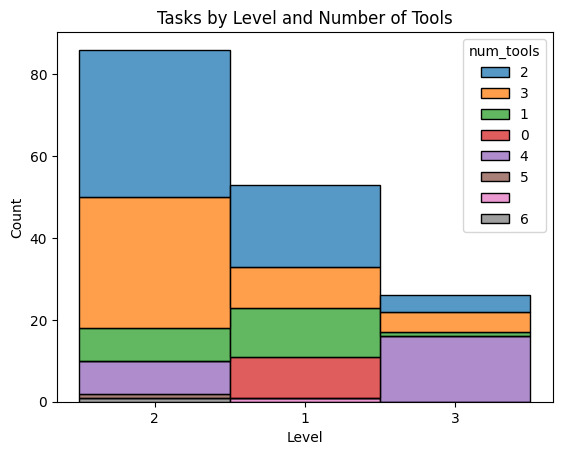

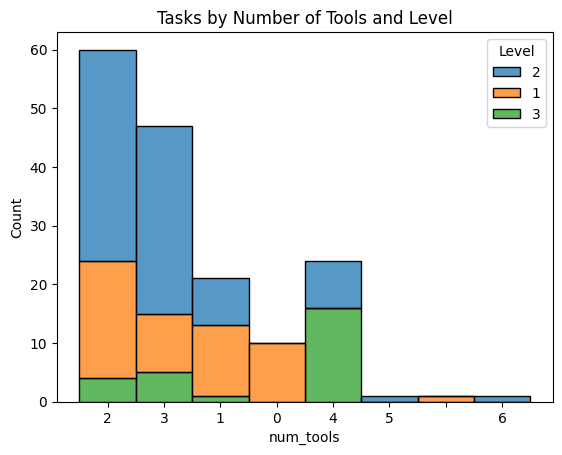

In [5]:
# histogram of tasks by level on the x axis and count on y colored by Level 
import matplotlib.pyplot as plt 
import seaborn as sns

sns.histplot(data=df_val, x="Level", hue="num_tools", multiple="stack"); 
plt.title("Tasks by Level and Number of Tools")

plt.figure()
## histogram of tasks by number tools on x axis
sns.histplot(data=df_val, x="num_tools", hue="Level", multiple="stack");
plt.title("Tasks by Number of Tools and Level")  

average_num_tools = df_val['num_tools'].replace(["", None], 0).astype(int).mean()
print("Average number of tools: ", average_num_tools)

## Loading the GPQA Dataset 



In [7]:
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("Idavidrein/gpqa", "gpqa_diamond")

Generating train split: 100%|██████████| 198/198 [00:00<00:00, 5307.72 examples/s]
